In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
data = pd.read_csv('covid19india.csv')
data

C:\Users\Md Imran\AppData\Local\Temp\ipykernel_17648\535682198.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('covid19india.csv')


,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,month,year
0,0,38.0,27/04/2020,NaN,NaN,NaN,NaN,West Bengal,Hospitalized,27,4,2020
1,1,2.0,27/04/2020,NaN,NaN,NaN,Bhilwara,Rajasthan,Hospitalized,27,4,2020
2,2,9.0,27/04/2020,NaN,NaN,NaN,Jaipur,Rajasthan,Hospitalized,27,4,2020
3,3,1.0,27/04/2020,28.0,M,Surajpol,Jaipur,Rajasthan,Deceased,27,4,2020
4,4,1.0,27/04/2020,NaN,NaN,NaN,Jaisalmer,Rajasthan,Hospitalized,27,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
138500,22790,2.0,07/07/2020,NaN,NaN,NaN,Dadra and Nagar Haveli,Dadra and Nagar Haveli and Daman and Diu,Hospitalized,7,7,2020
138501,22791,-9.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,Recovered,7,7,2020
138502,22792,-6.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,Recovered,7,7,2020
138503,22793,-1.0,07/07/2020,NaN,NaN,NaN,Kozhikode,Kerala,Recovered,7,7,2020


# predict no.of covid cases using polynomial Regression

In [68]:
Day = data[data['Current Status'] == 'Hospitalized'].groupby(['month','Day'])['Num Cases'].sum()
Day

month  Day
4      20      1239.0
       21      1537.0
       22      1292.0
       23      1667.0
       24      1408.0
               ...   
7      3      22718.0
       4      24018.0
       5      23942.0
       6      22500.0
       7      23147.0
Name: Num Cases, Length: 79, dtype: float64

In [69]:
x = np.arange(len(Day))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78])

In [70]:
y = Day.values
y

array([ 1239.,  1537.,  1292.,  1667.,  1408.,  1835.,  1607.,  3136.,
        3804.,  3410.,  3603.,  4792.,  5128.,  5904.,  7312.,  5942.,
        7204.,  6688.,  6678.,  6350.,  4311.,  3592.,  3562.,  3726.,
        3991.,  3808.,  4794.,  5049.,  4628.,  6154.,  5720.,  6023.,
        6536.,  6665.,  7111.,  6414.,  5907.,  7246.,  7254.,  8138.,
        8364.,  8789.,  7723.,  8812.,  9689.,  9847.,  9472., 10408.,
       10882.,  8536.,  9981., 11156., 11135., 11306., 12039., 11404.,
       10032., 11085., 13108., 13829., 14740., 15918., 15151., 13560.,
       15656., 16868., 18205., 18255., 20142., 19610., 18339., 18256.,
       19429., 21947., 22718., 24018., 23942., 22500., 23147.])

In [71]:
from sklearn.preprocessing import PolynomialFeatures
Poly = PolynomialFeatures(degree = 2)
X = Poly.fit_transform(x.reshape(-1,1))
X

array([[1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00],
       [1.000e+00, 4.000e+00, 1.600e+01],
       [1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 6.000e+00, 3.600e+01],
       [1.000e+00, 7.000e+00, 4.900e+01],
       [1.000e+00, 8.000e+00, 6.400e+01],
       [1.000e+00, 9.000e+00, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02],
       [1.000e+00, 1.100e+01, 1.210e+02],
       [1.000e+00, 1.200e+01, 1.440e+02],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 1.400e+01, 1.960e+02],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 1.600e+01, 2.560e+02],
       [1.000e+00, 1.700e+01, 2.890e+02],
       [1.000e+00, 1.800e+01, 3.240e+02],
       [1.000e+00, 1.900e+01, 3.610e+02],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 2.200e+01, 4.840e+02],
       [1.000e+00, 2.300e+01, 5.29

In [72]:
pd.DataFrame(X)

,0,1,2
0,1.0,0.0,0.0
1,1.0,1.0,1.0
2,1.0,2.0,4.0
3,1.0,3.0,9.0
4,1.0,4.0,16.0
...,...,...,...
74,1.0,74.0,5476.0
75,1.0,75.0,5625.0
76,1.0,76.0,5776.0
77,1.0,77.0,5929.0


In [74]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [75]:
reg.coef_

array([  0.        , -29.58318942,   3.64839913])

In [77]:
reg.intercept_

3342.336451007968

In [79]:
yp = reg.predict(X)
yp

array([ 3342.33645101,  3316.40166072,  3297.76366868,  3286.4224749 ,
        3282.37807937,  3285.63048211,  3296.17968309,  3314.02568233,
        3339.16847983,  3371.60807559,  3411.3444696 ,  3458.37766186,
        3512.70765238,  3574.33444116,  3643.25802819,  3719.47841348,
        3802.99559702,  3893.80957882,  3991.92035887,  4097.32793718,
        4210.03231375,  4330.03348857,  4457.33146165,  4591.92623298,
        4733.81780257,  4883.00617041,  5039.49133651,  5203.27330087,
        5374.35206348,  5552.72762434,  5738.39998347,  5931.36914085,
        6131.63509648,  6339.19785037,  6554.05740251,  6776.21375291,
        7005.66690157,  7242.41684848,  7486.46359365,  7737.80713707,
        7996.44747875,  8262.38461869,  8535.61855688,  8816.14929332,
        9103.97682802,  9399.10116098,  9701.52229219, 10011.24022166,
       10328.25494939, 10652.56647537, 10984.1747996 , 11323.07992209,
       11669.28184284, 12022.78056184, 12383.5760791 , 12751.66839462,
      

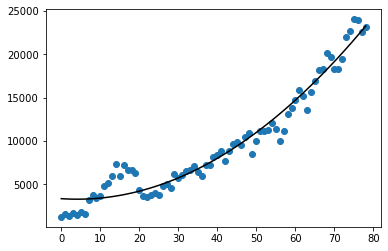

In [80]:
plt.scatter(x,y)
plt.plot(x,yp,color = 'k')
plt.show()

In [81]:
reg.score(X,y)*100

95.21995838701403

In [87]:
reg.predict(Poly.transform([[100]]))

array([36868.00878734])